한국어 Word2Vec 만들기(네이버 뉴스)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from eunjeon import Mecab

기사본문 전처리

In [6]:
제거할기사제목 = ['공략주', '특징주A/S', '교육주', '[인사]', '[승부주]', '[재송]']
제거제목리스트 = '|'.join(제거할기사제목)


In [7]:
data_unique = data.drop_duplicates(['뉴스기사본문'])
data_result = data_unique[data_unique['기사제목'].str.contains(제거제목리스트, na=False, case=False)]
data_result

,기업,기사발행일,기사제목,뉴스기사본문
0,네이쳐글로벌,2010.10.01. 오전 9:23,"[특징주] 네이쳐글로벌 상한가…""전 대표 횡령 확인 안돼""",비메모리 반도체 업체인 네이쳐글로벌이 전 대표 횡령 혐의에 대해 확인된 바 없다고 ...
2,네이쳐글로벌,2010.09.28. 오후 4:29,"네이쳐글로벌, 네비스탁측이 74만여주 장내매도",[이데일리 안재만 기자] 네비스탁은 특별관계자로 포함된 개인투자자들이 네이쳐글로벌(...
3,네이쳐글로벌,2010.09.16. 오전 9:23,"[특징주] 네이쳐글로벌, 투자경고 지정 이후 약세",네이쳐글로벌이 투자경고 지정 소식에 이어 전환사채(CB) 물량 상장에 따른 수급 불...
4,네이쳐글로벌,2010.09.14. 오후 4:21,"네비스탁외 51인, 네이쳐글로벌 지분 1.26% 줄어",[이데일리 유용무 기자] 네비스탁외 51인은 14일 신규 소액주주 의결권 규합 및 ...
5,네이쳐글로벌,2010.09.16. 오후 8:08,"네이쳐글로벌, 공시번복..불성실공시법인 지정",[아시아경제 문소정 기자] 한국거래소 코스닥시장본부는 16일 네이쳐글로벌에 대해 공...
...,...,...,...,...
7367,에이치엘비,2020.09.22. 오후 2:57,"""이래도 불법 공매도가 아니라고?""...에이치엘비 주주들 뿔났다","에이치엘비 주주들 ""공매도세력이 6개월간 주가 하락 시세 조정"" 주장\n거래소 감시..."
7370,에이치엘비,2020.12.30. 오전 11:16,"리보세라닙 병용 식도암 임상, 방사선 병행시 3명중 1명 `완전관해`",[이데일리 김재은 기자] 에이치엘비(028300)는 중국에서 수행된 리보세라닙(중국...
7371,에이치엘비,2020.12.14. 오전 9:59,"넥스트사이언스 관계사 나노젠 ""내년 5월 코로나백신 양산 계획""","[이데일리 김재은 기자] 넥스트사이언스(003580)는 관계사이자, 베트남 기업으로..."
7372,에이치엘비,2020.12.14. 오전 9:28,넥스트사이언스 관계사 나노젠 “코로나 백신 내년 5월 양산 계획”,사진=넥스트사이언스\n\n\n[파이낸셜뉴스] “재조합 단백질 조각(Recombina...


In [8]:
pattern1 = r'\([^)]*\)'
pattern2 = r"\[([^]]+)\]"

data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[/+]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('\r', '', s) for s in data_result['뉴스기사본문전처리']]
data_result.drop('뉴스기사본문', axis=1, inplace=True)
data_result
data_result.to_csv('dd_전체_새로추가한거.csv', index=None, encoding='utf-8-sig')

C:\Users\jangd\AppData\Local\Temp\ipykernel_20152\2690160614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_20152\2690160614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_20152\2690160614.py:6: SettingWithCopyWarning: 
A value is trying to be

전처리된 기사 본문 불러와서 word2vec시작

In [54]:
새로운전처리파일=pd.read_csv("./dd_전체_새로추가한거.csv")
새로운전처리파일

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.10.01. 오전 9:23,"[특징주] 네이쳐글로벌 상한가…""전 대표 횡령 확인 안돼""",비메모리 반도체 업체인 네이쳐글로벌이 전 대표 횡령 혐의에 대해 확인된 바 없다고 ...
1,네이쳐글로벌,2010.09.28. 오후 4:29,"네이쳐글로벌, 네비스탁측이 74만여주 장내매도",네비스탁은 특별관계자로 포함된 개인투자자들이 네이쳐글로벌 주식 만주를 장내 매도했...
2,네이쳐글로벌,2010.09.16. 오전 9:23,"[특징주] 네이쳐글로벌, 투자경고 지정 이후 약세",네이쳐글로벌이 투자경고 지정 소식에 이어 전환사채 물량 상장에 따른 수급 불안으로 ...
3,네이쳐글로벌,2010.09.14. 오후 4:21,"네비스탁외 51인, 네이쳐글로벌 지분 1.26% 줄어",네비스탁외 인은 일 신규 소액주주 의결권 규합 및 보유주식수 변동에 따라 네이쳐글...
4,네이쳐글로벌,2010.09.16. 오후 8:08,"네이쳐글로벌, 공시번복..불성실공시법인 지정",한국거래소 코스닥시장본부는 일 네이쳐글로벌에 대해 공시번복으로 인해 불성실공시법인...
...,...,...,...,...
10129,에이치엘비,2020.09.22. 오후 2:57,"""이래도 불법 공매도가 아니라고?""...에이치엘비 주주들 뿔났다",에이치엘비 주주들 공매도세력이 개월간 주가 하락 시세 조정 주장거래소 감시시스템 주...
10130,에이치엘비,2020.12.30. 오전 11:16,"리보세라닙 병용 식도암 임상, 방사선 병행시 3명중 1명 `완전관해`",에이치엘비는 중국에서 수행된 리보세라닙 병용 임상 결과 위암 식도암에서 다시 한번...
10131,에이치엘비,2020.12.14. 오전 9:59,"넥스트사이언스 관계사 나노젠 ""내년 5월 코로나백신 양산 계획""",넥스트사이언스는 관계사이자 베트남 기업으로 유일하게 코로나 백신 임상을 승인받은 ...
10132,에이치엘비,2020.12.14. 오전 9:28,넥스트사이언스 관계사 나노젠 “코로나 백신 내년 5월 양산 계획”,사진넥스트사이언스 재조합 단백질 조각을 통해 만든 나노코박스는 높은 면역반응을 이끌...


In [57]:
원래있었던뉴스기사=pd.read_csv("./dd_전체.csv")
원래있었던뉴스기사.drop(["뉴스기사본문"],inplace=True,axis=1)
원래있었던뉴스기사


,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.08.16. 오후 5:21,"네이쳐글로벌, 반기검토의견 ""의견거절'…거래정지",네이쳐글로벌는 일 반기 검토 의견이 의견거절로 관리종목 지정 사유가 발생했다고 공시...
1,네이쳐글로벌,2010.07.15. 오후 6:46,네이쳐글로벌 신용등급 `CC`로 두단계 하향,네이쳐글로벌의 신용등급을 기존 에서 으로 하향 조정한다고 한신정평가가 일 밝혔다....
2,네이쳐글로벌,2010.06.03. 오후 5:06,"네이쳐글로벌, 20대 1 감자 실시",네이쳐글로벌은 대 감자를 결의했다고 일 공시했다.감자 주주총회일은 다음달 일 감...
3,네이쳐글로벌,2010.05.24. 오전 10:41,<생생코스닥> 네이쳐글로벌 3거래일 연속 하한가,네이쳐글로벌이 연 거래일 연속 하한가를 기록하며 주가가 원 선 마저 위협 받고 있다...
4,네이쳐글로벌,2010.05.18. 오후 1:23,"네이쳐글로벌 ""생수시장 진출 하반기 150억 계획""",네이쳐글로벌은 대규모 생수회사를 자산양수도 방식으로 인수 추진 중이라고 일 밝혔다....
...,...,...,...,...
5179,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
5180,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
5181,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
5182,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [58]:
새롭게합친거=pd.concat([새로운전처리파일,원래있었던뉴스기사],axis=0)
새롭게합친거

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,네이쳐글로벌,2010.10.01. 오전 9:23,"[특징주] 네이쳐글로벌 상한가…""전 대표 횡령 확인 안돼""",비메모리 반도체 업체인 네이쳐글로벌이 전 대표 횡령 혐의에 대해 확인된 바 없다고 ...
1,네이쳐글로벌,2010.09.28. 오후 4:29,"네이쳐글로벌, 네비스탁측이 74만여주 장내매도",네비스탁은 특별관계자로 포함된 개인투자자들이 네이쳐글로벌 주식 만주를 장내 매도했...
2,네이쳐글로벌,2010.09.16. 오전 9:23,"[특징주] 네이쳐글로벌, 투자경고 지정 이후 약세",네이쳐글로벌이 투자경고 지정 소식에 이어 전환사채 물량 상장에 따른 수급 불안으로 ...
3,네이쳐글로벌,2010.09.14. 오후 4:21,"네비스탁외 51인, 네이쳐글로벌 지분 1.26% 줄어",네비스탁외 인은 일 신규 소액주주 의결권 규합 및 보유주식수 변동에 따라 네이쳐글...
4,네이쳐글로벌,2010.09.16. 오후 8:08,"네이쳐글로벌, 공시번복..불성실공시법인 지정",한국거래소 코스닥시장본부는 일 네이쳐글로벌에 대해 공시번복으로 인해 불성실공시법인...
...,...,...,...,...
5179,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
5180,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
5181,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
5182,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [75]:
새롭게합친거.drop_duplicates(['기사제목'],inplace=True)
새롭게합친거.to_csv("전체새롭게합친거.csv",encoding="utf-8-sig")

In [62]:
# NULL 값 존재 유무
print(새롭게합친거.isnull().values.any())

False


In [63]:
print(len(새롭게합친거))   # 기사본문 개수 출력

14812


In [64]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [65]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
tokenized_data = []
output=[]
for sentence in 새롭게합친거['뉴스기사본문전처리']:
    temp_X = mecab.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)


한글자제거

In [66]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)
    

이중리스트제거

In [20]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [21]:
list_text_1

['메모리',
 '반도체',
 '업체',
 '글로벌',
 '대표',
 '횡령',
 '혐의',
 '확인',
 '주가',
 '급등',
 '코스닥',
 '시장',
 '글로벌',
 '오전',
 '현재',
 '전날',
 '거래',
 '이날',
 '아침',
 '글로벌',
 '전현',
 '대표',
 '이사',
 '횡령',
 '배임',
 '납입',
 '관련',
 '조회',
 '공시',
 '답변',
 '현재',
 '대표',
 '이사',
 '이승우',
 '횡령',
 '배임',
 '납입',
 '확인',
 '대표',
 '이사',
 '박지우',
 '횡령',
 '배임',
 '납입',
 '고소',
 '고발',
 '사항',
 '확인',
 '장기',
 '해외',
 '출장',
 '확인',
 '로또',
 '광풍',
 '누적',
 '기록',
 '개인',
 '투자자',
 '김병철',
 '김정은',
 '관상',
 '지도력',
 '우수',
 '하나',
 '성격',
 '당첨',
 '빈털터리',
 '로또',
 '번호',
 '분석',
 '모바일',
 '공부',
 '네비',
 '스탁',
 '특별',
 '관계자',
 '포함',
 '개인',
 '투자자',
 '글로벌',
 '주식',
 '장내',
 '매도',
 '공시',
 '보유',
 '주식',
 '감소',
 '네비',
 '스탁',
 '글로벌',
 '경영',
 '참여',
 '선언',
 '데일리',
 '문자',
 '시세',
 '추천',
 '진단',
 '상담',
 '정보',
 '데일리',
 '모바일',
 '실시간',
 '해외',
 '지수',
 '글로벌',
 '경제',
 '뉴스',
 '금융',
 '정보',
 '터미널',
 '데일리',
 '종합',
 '경제',
 '정보',
 '미디어',
 '데일리',
 '무단',
 '전재',
 '배포',
 '금지',
 '안방',
 '경제',
 '뉴스',
 '재테크',
 '정보',
 '데일리',
 '안재만',
 '글로벌',
 '투자',
 '경고',
 '지정',
 '소식',
 '전환사채',
 '물량',
 '상장',
 '수급',
 '불안',


In [22]:
from collections import Counter

In [74]:
횟수=Counter(list_text_1)
횟수["적격성"]
# # for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

4

기사의 길이 및 분포 확인

기사의 최대 길이 : 3137
기사의 평균 길이 : 176.41351606805293


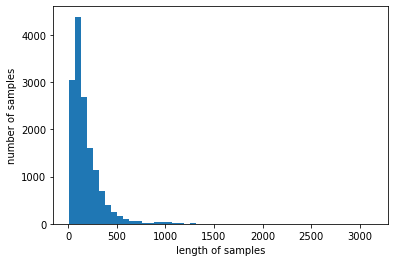

In [67]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

word2vec훈련

In [68]:
# Word2Vec 훈련시키기

from gensim.models import Word2Vec
model = Word2Vec(sentences = remove_one_word, window = 5, min_count = 6, workers = 4, sg = 1)
# window는 주변단어를 어디까지 해서 학습하냐
# min_count를 5로 준 이유는 6번나온 단어부터 경제단어가 조금씩 나오기 시작함
# skip gram이 훨씬 학습이 좋음

In [69]:
# 완성된 임베딩 매트릭스의 크기 확인

model.wv.vectors.shape

(13546, 100)

유사도확인

In [70]:
print(model.wv.most_similar(["폐지"],topn=10))
dataframe_1=model.wv.most_similar(["폐지"],topn=10)

dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('퇴출', 0.8009562492370605), ('심사', 0.7645372152328491), ('상장', 0.7610036730766296), ('격성', 0.7490750551223755), ('존폐', 0.739281177520752), ('미승', 0.728987455368042), ('요주', 0.7256741523742676), ('이의', 0.7248959541320801), ('속개', 0.721016526222229), ('일내', 0.7131227254867554)]


,단어,유사도
0,퇴출,0.800956
1,심사,0.764537
2,상장,0.761004
3,격성,0.749075
4,존폐,0.739281
5,미승,0.728987
6,요주,0.725674
7,이의,0.724896
8,속개,0.721017
9,일내,0.713123


In [71]:
새롭게합친거['뉴스기사 레이블']=새롭게합친거['기사제목']
새롭게합친거.reset_index(inplace=True)

뉴스기사 레이블 시키기

In [72]:
keywords=["폐지","퇴출","기로","벼랑"]
for i in range(len(새롭게합친거)):
    if any(keyword in str(새롭게합친거["뉴스기사본문전처리"][i]) for keyword in keywords)==True:
        새롭게합친거['뉴스기사 레이블'][i]=1
    else:
        새롭게합친거['뉴스기사 레이블'][i]=0


C:\Users\jangd\AppData\Local\Temp\ipykernel_20152\1581934370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  새롭게합친거['뉴스기사 레이블'][i]=0
C:\Users\jangd\AppData\Local\Temp\ipykernel_20152\1581934370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  새롭게합친거['뉴스기사 레이블'][i]=1


In [47]:
새롭게합친거[새롭게합친거["뉴스기사 레이블"]==1]

,index,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사 레이블
9,9,네이쳐글로벌,2010.09.03. 오후 5:18,"네이쳐글로벌, 전환청구권 240만주 행사",네이쳐글로벌은 전환청구권 만주를 전환가액 원에 행사한다고 일 공시했다. 전체 물량의...,1
22,22,네이쳐글로벌,2010.04.13. 오전 7:56,"네이쳐글로벌, 네이처메이드 대상 80만주 유증",네이쳐글로벌은 제자인 네이쳐메이드와 남밤비를 대상으로 만주의 유상증자를 하기로 결의...,1
25,25,네이쳐글로벌,2010.02.01. 오후 5:32,"네이쳐글로벌, LED업체 인수…연 1천억 매출 기대",네이쳐글로벌이 일 일본의 업체 와 경영권 및 주식 양수도계약을 체결했다고 밝혔다....,1
30,30,네이쳐글로벌,2010.10.03. 오후 5:07,코스닥 불성실공시법인 큰폭 증가,하반기 들어 크게 줄어들었던 코스닥 기업의 불성실공시법인지정건수가 지난달 큰 폭으로...,1
33,33,네이쳐글로벌,2010.06.04. 오전 8:23,장 마감 후 주요 종목 뉴스-3일,코스피 시장남양개발은 계열회사인 부영주택으로부터 억만원을 장기차입하는 계약을 체결했...,1
...,...,...,...,...,...,...
15186,5052,에스티큐브,2018.12.02. 오후 4:08,"급락장서 수익률 38%…""소외된 1~2개 종목 집중""",한경 스타워즈 고수 인터뷰 김명대 증권 도곡스타센터 부장에스티큐브녹원씨엔아이 등 ...,1
15189,5055,에스티큐브,2018.09.19. 오후 4:09,"[스타워즈]KB 김명대, 수익률 14%p↑…에스티큐브 '적중'",국내 증시가 부진한 흐름을 보인 일 한경 스타워즈 실전투자대회 참가자들의 수익률...,1
15216,5082,코스메카코리아,2018.09.23. 오전 9:17,"추석 지나면 성수기, 화색 도는 화장품株 '코스메카코리아'",코스메카코리아 방탄소년단의 코스메틱스 등 신규 고객사 업고 실적 분기는 화장품 업...,1
15247,5113,크리스에프앤씨,2018.09.28. 오전 9:51,"대신證 ""크리스에프앤씨, 대리점 출점 늘려 매출 성장 전망""",상장예정기업인 크리스에프앤씨가 매출 성장을 이어갈 것이란 전망이 나왔다. 대신증권...,1
